## This project aims to predict the compressive strength of concrete with maximum accuracy, for various quantities of constituent components as the input.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn import metrics

# Import zscore for scaling
from scipy.stats import zscore

# for Q-Q plots
import scipy.stats as stats

# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [2]:
#import data
data=pd.read_csv('C:/Users/LENOVO/datascience/greatlearning/Project_featureEngg_Pipeline_FMTST/concrete.csv')

In [3]:
#Check the top rows of the data
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
#Exploratory Data Ananlysis

In [5]:
data.shape

(1030, 9)

In [6]:
#Data type of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#Summarize the presence of null value
print(data.isnull().sum())

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


In [8]:
#Describing the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


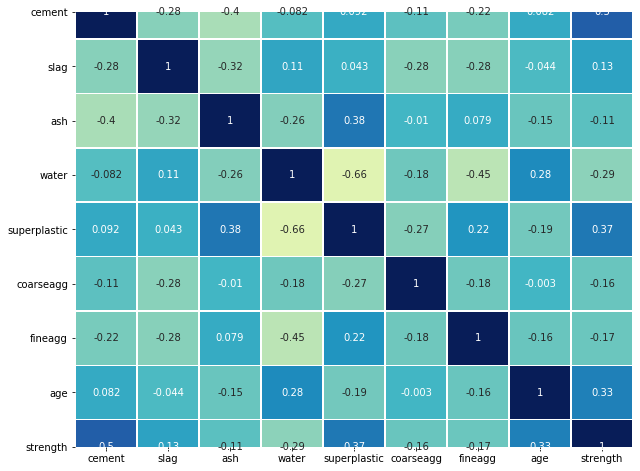

In [9]:
#Coreltion matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [10]:
#Univariate Analysis

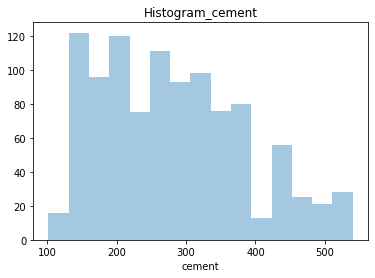

In [11]:
#cement
sns.distplot(data['cement'],kde=False)
plt.title('Histogram_cement')
plt.show()

In [12]:
data['cement'].describe()

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

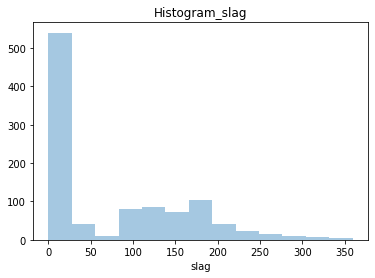

In [13]:
#slag
sns.distplot(data['slag'],kde=False)
plt.title('Histogram_slag')
plt.show()

In [14]:
data['slag'].describe()

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64

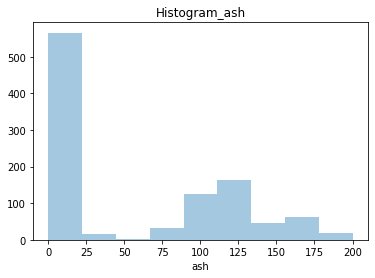

In [15]:
#ash
sns.distplot(data['ash'],kde=False)
plt.title('Histogram_ash')
plt.show()

In [16]:
data['ash'].describe()

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64

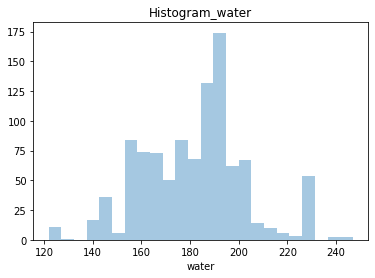

In [17]:
#water
sns.distplot(data['water'],kde=False)
plt.title('Histogram_water')
plt.show()

In [18]:
data['water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

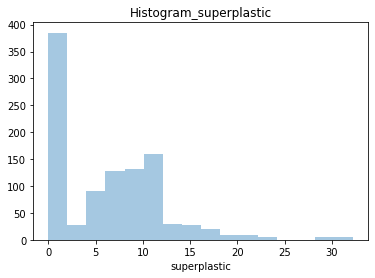

In [19]:
#superplastic
sns.distplot(data['superplastic'],kde=False)
plt.title('Histogram_superplastic')
plt.show()

In [20]:
data['superplastic'].describe()

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64

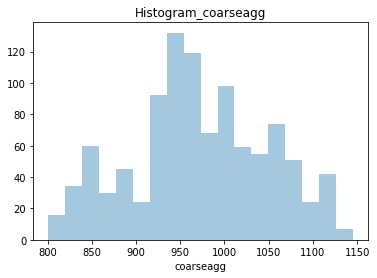

In [21]:
#coarseagg
sns.distplot(data['coarseagg'],kde=False)
plt.title('Histogram_coarseagg')
plt.show()

In [22]:
data['coarseagg'].describe()

count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64

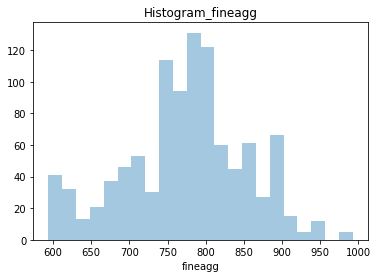

In [23]:
#fineagg
sns.distplot(data['fineagg'],kde=False)
plt.title('Histogram_fineagg')
plt.show()

In [24]:
data['fineagg'].describe()

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64

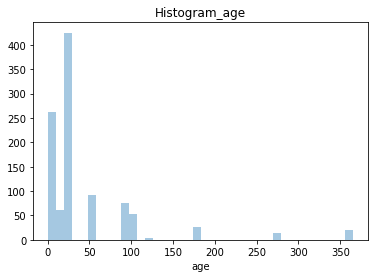

In [25]:
#age
sns.distplot(data['age'],kde=False)
plt.title('Histogram_age')
plt.show()

In [26]:
data['age'].describe()

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

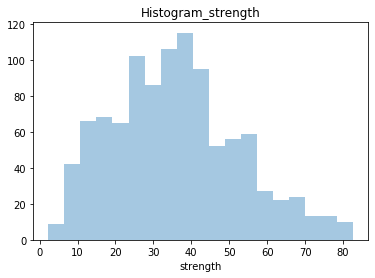

In [27]:
#strength
sns.distplot(data['strength'],kde=False)
plt.title('Histogram_strength')
plt.show()

In [28]:
data['strength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

In [29]:
#outliers of each attribute

In [30]:
# function to create histogram, Q-Q plot and  boxplot



def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

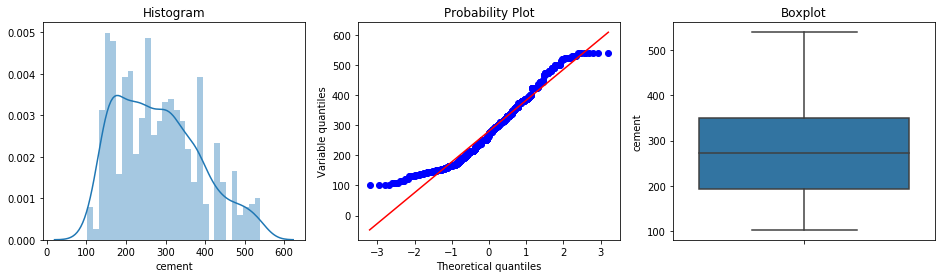

In [31]:
# let's visualise outliers in cement

diagnostic_plots(data, 'cement')

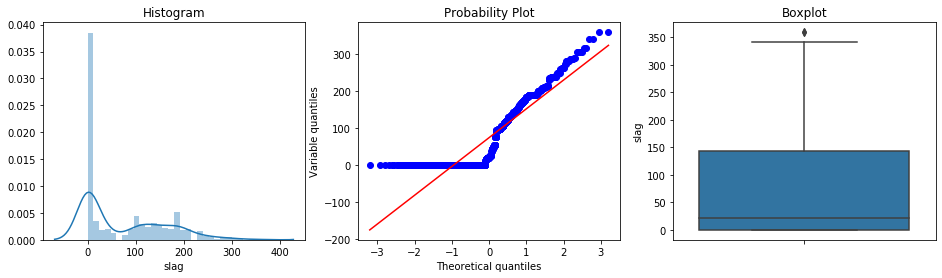

In [32]:
# let's find outliers in slag

diagnostic_plots(data, 'slag')

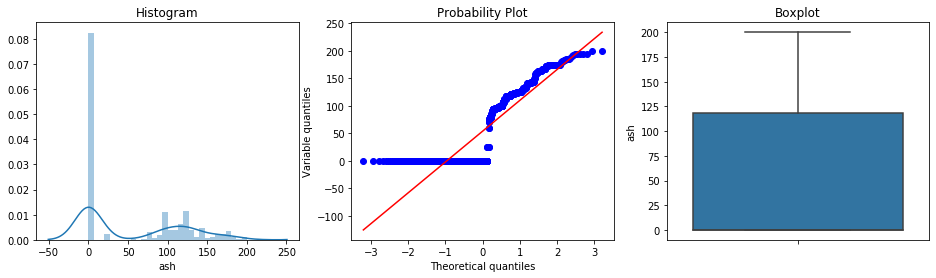

In [33]:
# let's find outliers in ash

diagnostic_plots(data, 'ash')

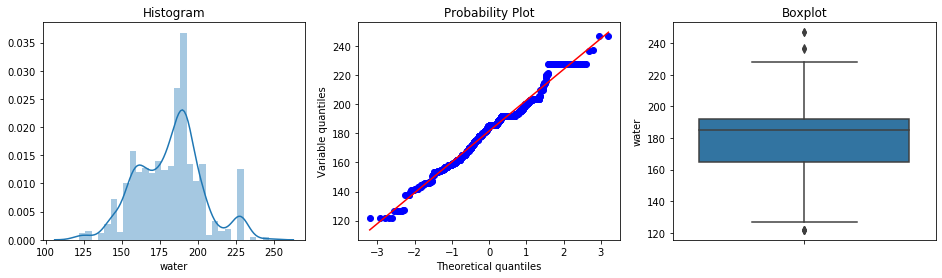

In [34]:
# let's find outliers in water

diagnostic_plots(data, 'water')

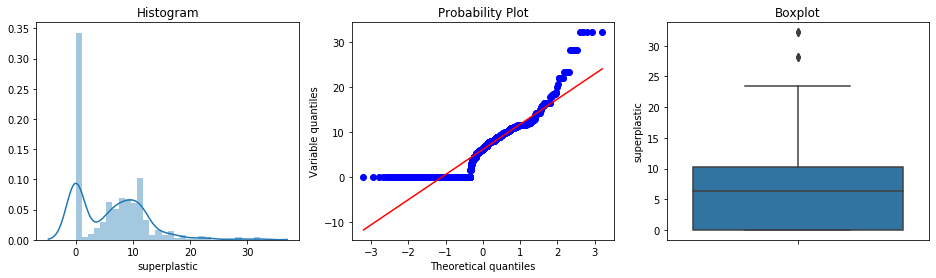

In [35]:
# let's find outliers in superplastic

diagnostic_plots(data, 'superplastic')

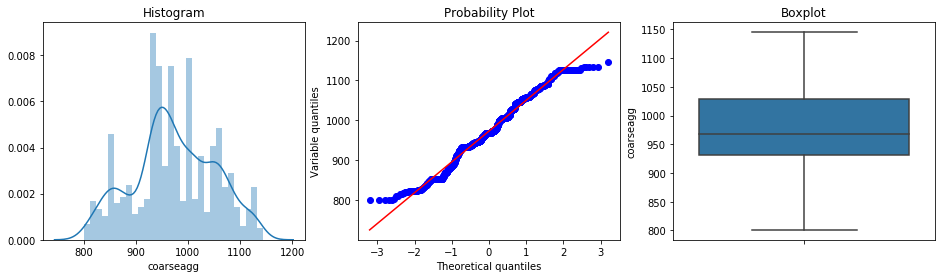

In [36]:
# let's find outliers in coarseagg

diagnostic_plots(data, 'coarseagg')

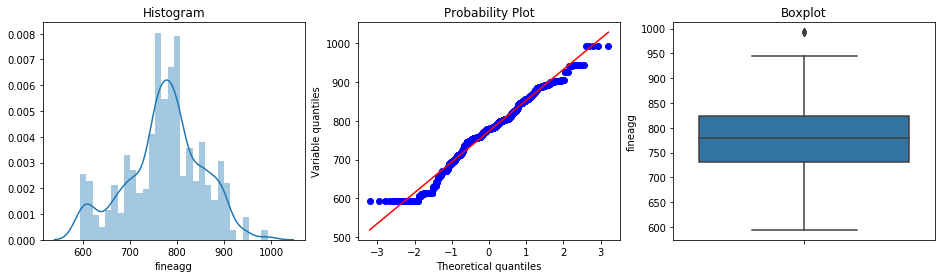

In [37]:
# let's find outliers in fineagg

diagnostic_plots(data, 'fineagg')

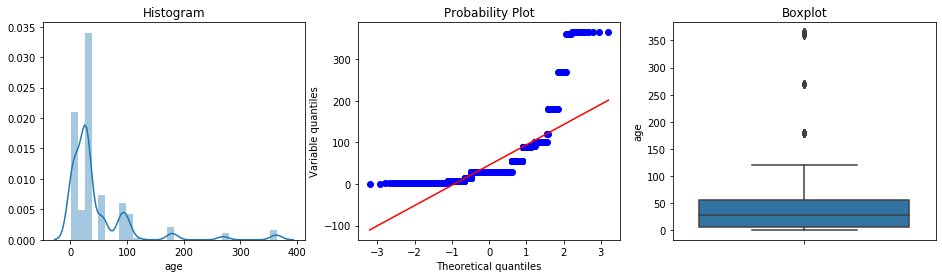

In [38]:
# let's find outliers in age

diagnostic_plots(data, 'age')

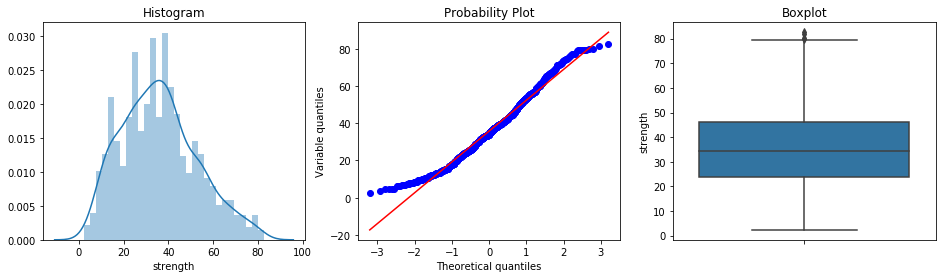

In [39]:
# let's find outliers in strength

diagnostic_plots(data, 'strength')

In [40]:
#Creating function to view attribute
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [41]:
#Checking outliers data in cement
outlier_datapoints_cement = detect_outlier(data['cement'])
print(outlier_datapoints_cement)

[]


In [42]:
#Checking outliers in slag
outlier_datapoints_slag = detect_outlier(data['slag'])
print(outlier_datapoints_slag)

[342.1, 342.1, 359.4, 359.4]


In [43]:
#Checking outliers in ash
outlier_datapoints_ash = detect_outlier(data['ash'])
print(outlier_datapoints_ash)

[342.1, 342.1, 359.4, 359.4]


In [44]:
#Checking outliers in water
outlier_datapoints_water = detect_outlier(data['water'])
print(outlier_datapoints_water)

[342.1, 342.1, 359.4, 359.4, 247.0, 246.9]


In [45]:
#Checking outliers in superplastic
outlier_datapoints_superplastic = detect_outlier(data['superplastic'])
print(outlier_datapoints_superplastic)

[342.1, 342.1, 359.4, 359.4, 247.0, 246.9, 28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2]


In [46]:
#Checking outliers in coarseagg
outlier_datapoints_coarseagg = detect_outlier(data['coarseagg'])
print(outlier_datapoints_coarseagg)

[342.1, 342.1, 359.4, 359.4, 247.0, 246.9, 28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2]


In [47]:
#Checking outliers in fineagg
outlier_datapoints_fineagg = detect_outlier(data['fineagg'])
print(outlier_datapoints_fineagg)

[342.1, 342.1, 359.4, 359.4, 247.0, 246.9, 28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2]


In [48]:
#Checking outliers in age
outlier_datapoints_age = detect_outlier(data['age'])
print(outlier_datapoints_age)

[342.1, 342.1, 359.4, 359.4, 247.0, 246.9, 28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2, 365, 365, 270, 360, 365, 365, 270, 270, 270, 270, 270, 360, 360, 365, 360, 365, 365, 270, 365, 270, 270, 365, 365, 365, 360, 270, 270, 365, 360, 270, 365, 365, 270]


In [49]:
#Checking outliers in strength
outlier_datapoints_strength = detect_outlier(data['strength'])
print(outlier_datapoints_strength)

[342.1, 342.1, 359.4, 359.4, 247.0, 246.9, 28.2, 28.2, 32.2, 32.2, 28.2, 32.2, 32.2, 28.2, 32.2, 28.2, 365, 365, 270, 360, 365, 365, 270, 270, 270, 270, 270, 360, 360, 365, 360, 365, 365, 270, 365, 270, 270, 365, 365, 365, 360, 270, 270, 365, 360, 270, 365, 365, 270]


In [50]:
#Check the quartile

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print("The first quartile Q1 is \n", Q1)
print("The third quartile Q3 is \n", Q1)
print("The IQR range is \n", IQR)

The first quartile Q1 is 
 cement          192.375
slag              0.000
ash               0.000
water           164.900
superplastic      0.000
coarseagg       932.000
fineagg         730.950
age               7.000
strength         23.710
Name: 0.25, dtype: float64
The third quartile Q3 is 
 cement          192.375
slag              0.000
ash               0.000
water           164.900
superplastic      0.000
coarseagg       932.000
fineagg         730.950
age               7.000
strength         23.710
Name: 0.25, dtype: float64
The IQR range is 
 cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [51]:
#Printing the outlier by IQR
outlier=((data <(Q1 - 1.5 * IQR))| (data > (Q3 + 1.5 * IQR))).sum()
print(outlier)

cement           0
slag             2
ash              0
water            9
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         4
dtype: int64


In [52]:
#Multi variate analysis

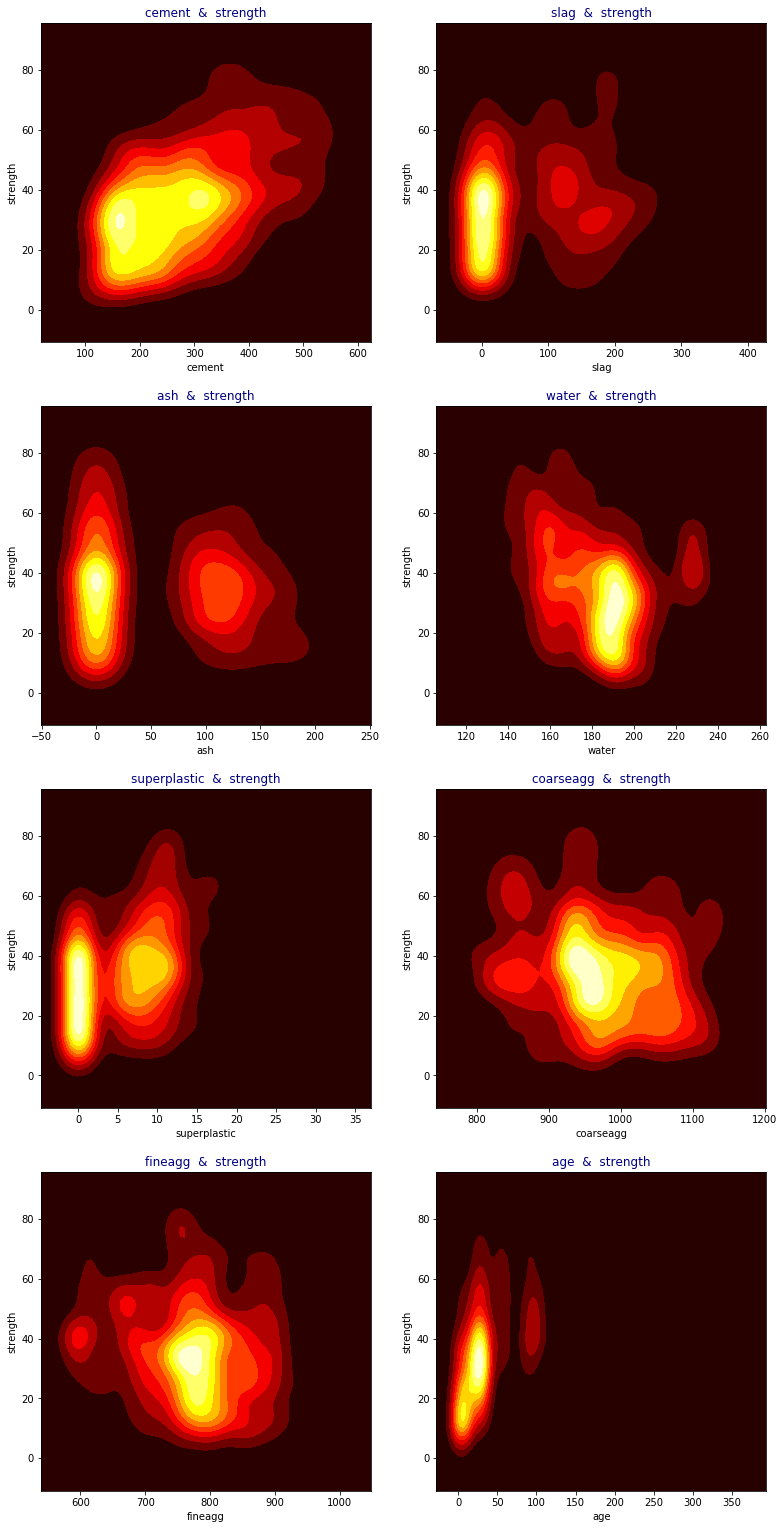

In [53]:
#Contour plot between ingredients and compressive strength
import itertools
cols = [i for i in data.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(data[i],
                data["strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  strength",color="navy")

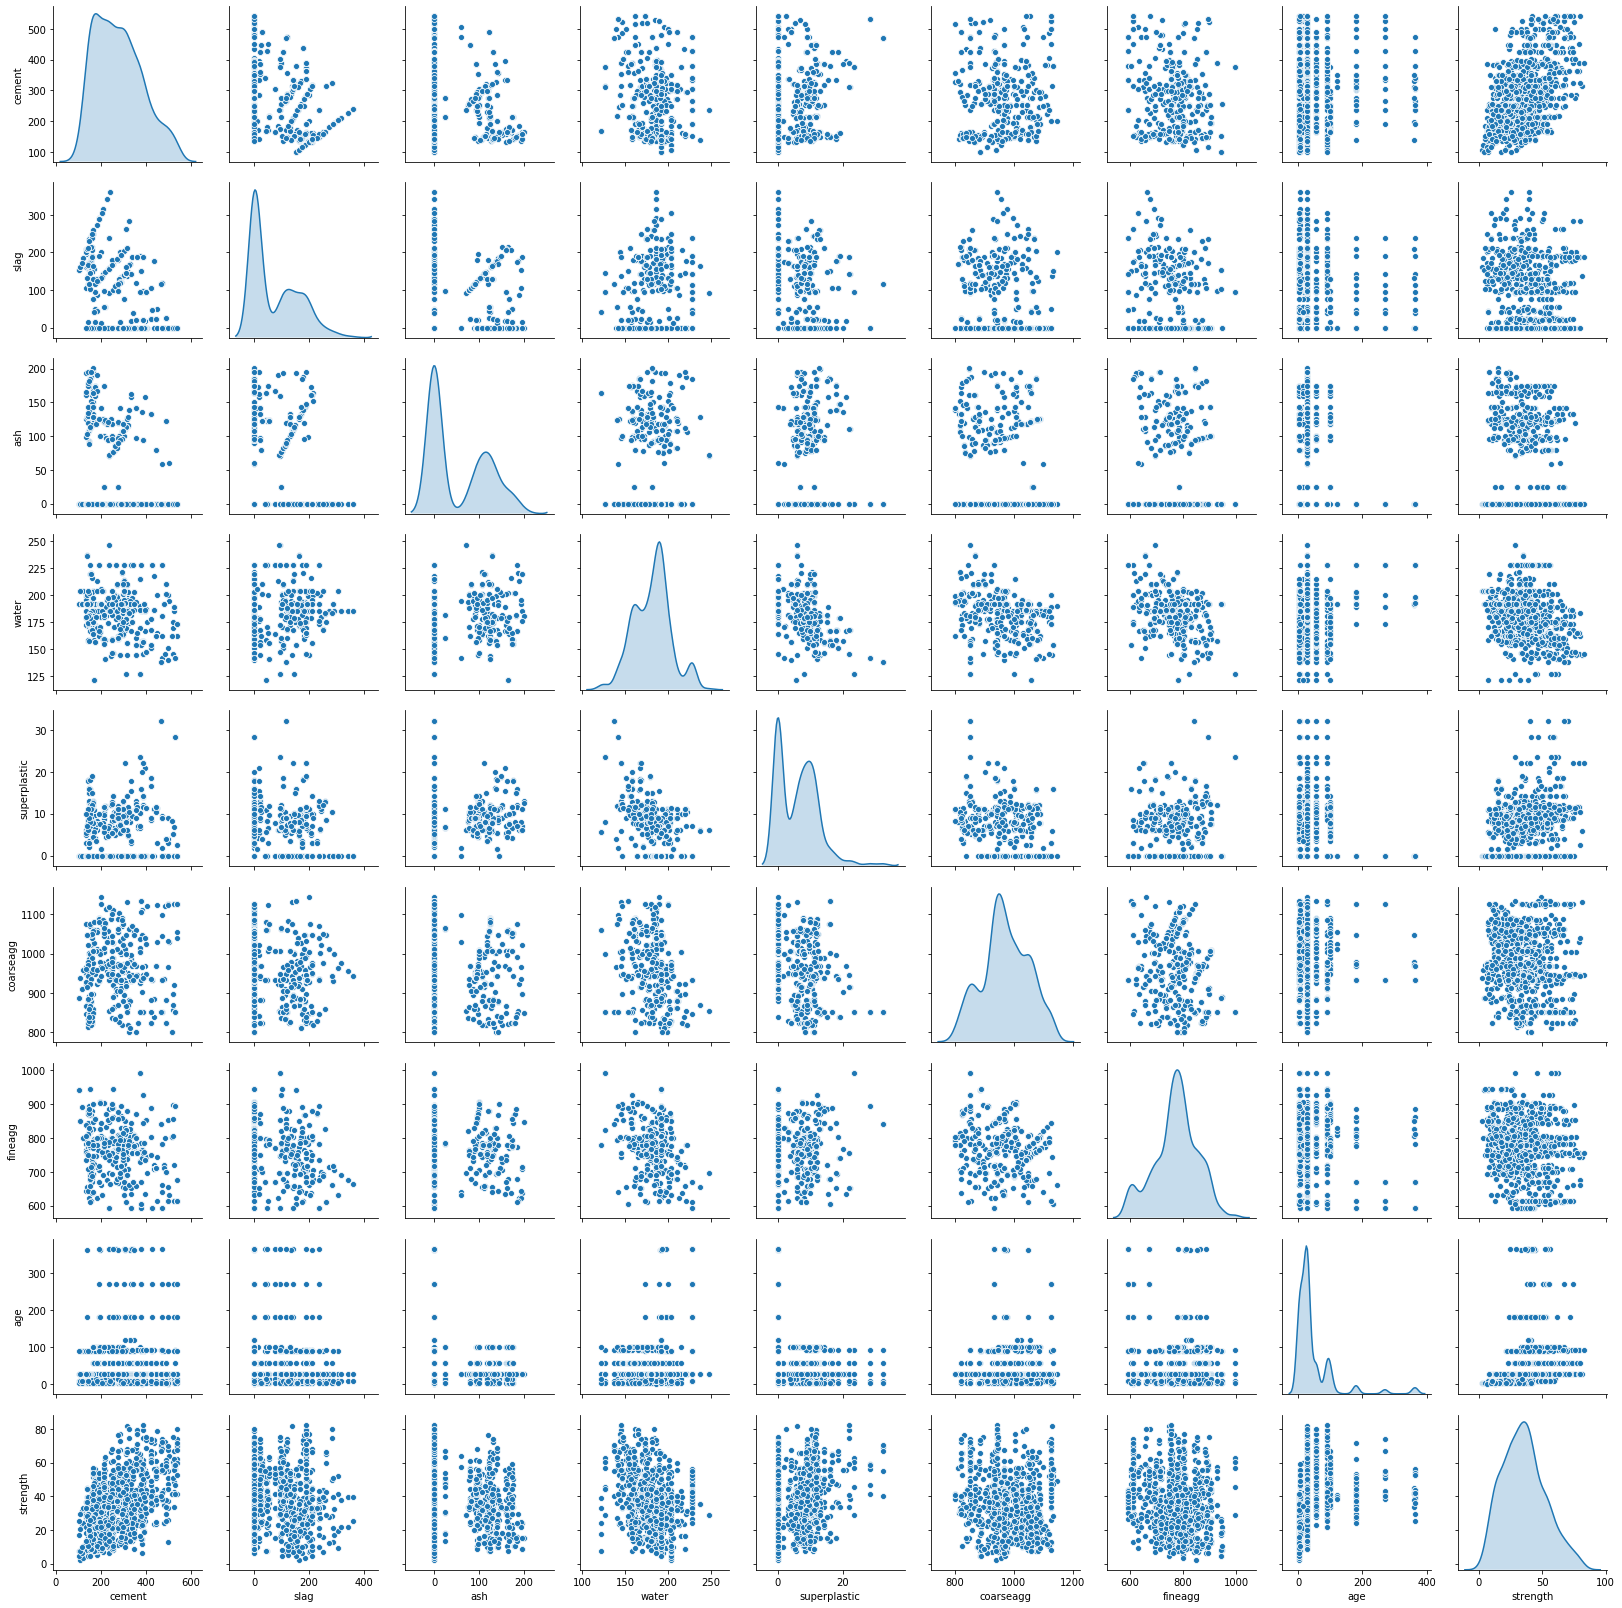

In [54]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(data, diag_kind='kde')

### strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor.
strength vs slag: There is no particular trend.
strength vs slag: There is also no particular trend.
strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.
strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.
Other attributes does not give any strong relationship with strength.
Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

In [55]:
#Outlier 
q1_data=data.quantile(0.25)
q3_data=data.quantile(0.75)
IQR=q3_data-q1_data
cwo=((data.iloc[:] <(q1_data-1.5*IQR))|(data.iloc[:]>(q3_data+1.5*IQR))).sum(axis=0)
opdf=pd.DataFrame(cwo,index=data.columns,columns=['No. of Outliers'])
opdf['Percentage Outliers']=round(opdf['No. of Outliers']*100/len(data),2)
opdf

,No. of Outliers,Percentage Outliers
cement,0,0.00
slag,2,0.19
ash,0,0.00
water,9,0.87
superplastic,10,0.97
coarseagg,0,0.00
fineagg,5,0.49
age,59,5.73
strength,4,0.39


In [56]:
#Convert the outlier to NaN
pd.DataFrame.mask

<function pandas.core.generic.NDFrame.mask(self, cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False)>

In [58]:
data3=data.mask(data.sub(data.mean()).div(data.std()).abs().gt(3))

In [59]:
#Check if the outlier got converted to Nan
data3.isnull().sum()

cement           0
slag             4
ash              0
water            2
superplastic    10
coarseagg        0
fineagg          0
age             33
strength         0
dtype: int64

In [60]:
#outliers will be treated using MICE (Multiple Imputation using Chained Equations) approach
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [61]:
imp = IterativeImputer()
imp.fit(data3)
data4=pd.DataFrame(imp.transform(data3),columns=data3.columns)

In [62]:
#Check NaN after imputation
data4.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [63]:
#Check the quartile after imputation

Q1_v2=data4.quantile(0.25)
Q3_v2=data4.quantile(0.75)
IQR_v2=Q3_v2-Q1_v2
print("The first quartile Q1 is \n", Q1_v2)
print("The third quartile Q3 is \n", Q3_v2)
print("The IQR range is \n", IQR_v2)

The first quartile Q1 is 
 cement          192.375
slag              0.000
ash               0.000
water           164.900
superplastic      0.000
coarseagg       932.000
fineagg         730.950
age               7.000
strength         23.710
Name: 0.25, dtype: float64
The third quartile Q3 is 
 cement           350.000
slag             142.950
ash              118.300
water            192.000
superplastic      10.200
coarseagg       1029.400
fineagg          824.000
age               56.000
strength          46.135
Name: 0.75, dtype: float64
The IQR range is 
 cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [64]:
#Printing the outlier by IQR
outlier2=((data4 <(Q1_v2 - 1.5 * IQR_v2))| (data4 > (Q3_v2 + 1.5 * IQR_v2))).sum()
print(outlier2)

cement           0
slag             0
ash              0
water            7
superplastic     0
coarseagg        0
fineagg          5
age             26
strength         4
dtype: int64


In [65]:
#We can see that the outliers have decreased after MICE imputation

In [66]:
#Scaling the dataset

data4_scaled = data4.apply(zscore)
data4_scaled=pd.DataFrame(data4,columns=data4.columns)

In [67]:
#Here, all the attributes in the same scale(unit) except the age attribute.
#Hence, we are scaling the attributes. We are using zscore for scaling

In [68]:
##Splitting independent and dependent variables
X=data4_scaled.iloc[:,0:8]
Y = data4_scaled.iloc[:,8]

In [69]:
# Determining c\omposite features by PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-145.69164774,  132.98397536,  -24.32557526, ...,  -24.27619571,
           2.35551748,    1.05799412],
       [-117.59969095,  -93.32358541,  -86.85942387, ...,    8.90816727,
          -3.33995382,   -2.01242272],
       [ -37.29411592, -105.79311628,   56.81981971, ...,  -12.10867879,
          12.50115353,   -1.090472  ],
       ...,
       [ -21.91914178,   53.9660334 ,   75.5844841 , ...,    0.99396168,
          -3.52261806,    1.57019512],
       [ 101.25542569,   52.64717143,  -28.32897543, ...,  -18.76360887,
          -5.00949609,   -1.56187604],
       [ 298.66860067,   -3.72867224, -182.0495732 , ...,   -6.10666671,
           1.39932912,    4.14544048]])

In [70]:
pca.get_covariance()

array([[10921.58021992, -2464.57385853, -2658.29903366,  -179.81534132,
           25.37375063,  -888.54620345, -1866.13062773,   168.91896641],
       [-2464.57385853,  7277.85849286, -1767.16805352,   195.180493  ,
           26.21051322, -1896.39606411, -1910.3641316 ,  -172.94103439],
       [-2658.29903366, -1767.16805352,  4095.61654052,  -352.06711816,
          152.38842557,   -49.5652797 ,   405.90744978,  -189.70374978],
       [ -179.81534132,   195.180493  ,  -352.06711816,   450.66434186,
          -77.64060262,  -296.54982849,  -767.57263062,   125.63750309],
       [   25.37375063,    26.21051322,   152.38842557,   -77.64060262,
           30.77343744,  -105.56991203,    92.98902844,   -22.84119181],
       [ -888.54620345, -1896.39606411,   -49.5652797 ,  -296.54982849,
         -105.56991203,  6045.67735746, -1112.65019384,    48.24056338],
       [-1866.13062773, -1910.3641316 ,   405.90744978,  -767.57263062,
           92.98902844, -1112.65019384,  6428.1877918 ,  -

In [71]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([3.48161545e-01, 2.63214065e-01, 1.97692219e-01, 1.15682089e-01,
       4.26793707e-02, 3.03954464e-02, 1.91370047e-03, 2.61564340e-04])

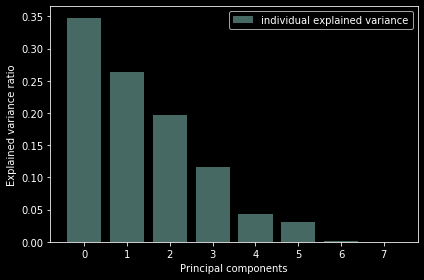

In [72]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [73]:
#Thus we can see from the above plot that first two components constitute almost 65% of the variance.
#Third,fourth and fifth components has 42% of the data sprad.
#The last component has less than 5% of the variance.Hence we can drop the sixth and 7th component

In [74]:
pca=PCA(n_components=6)
X_new=pca.fit_transform(X)
X_new

array([[-145.69164774,  132.98397536,  -24.32557526,  -51.56099095,
          12.57186405,  -24.27619571],
       [-117.59969095,  -93.32358541,  -86.85942387,   -8.65810094,
         -38.98181584,    8.90816727],
       [ -37.29411592, -105.79311628,   56.81981971,    6.78927205,
           1.5496603 ,  -12.10867879],
       ...,
       [ -21.91914178,   53.9660334 ,   75.5844841 ,   67.85952262,
         -10.39130018,    0.99396168],
       [ 101.25542569,   52.64717143,  -28.32897543,   42.05033223,
         106.08310391,  -18.76360887],
       [ 298.66860067,   -3.72867224, -182.0495732 ,  -12.35332231,
         -52.2846885 ,   -6.10666671]])

In [75]:
pca.get_covariance()

array([[10920.45612384, -2465.89809796, -2659.96263493,  -184.66734856,
           26.60951749,  -889.62998258, -1867.54445543,   168.95965773],
       [-2465.89809796,  7276.2987349 , -1769.12591199,   189.44678469,
           27.57946481, -1897.67535172, -1912.03103117,  -172.89271447],
       [-2659.96263493, -1769.12591199,  4093.16903757,  -359.38099388,
          153.56795351,   -51.18823248,   403.80502462,  -189.64066063],
       [ -184.66734856,   189.44678469,  -359.38099388,   430.94123601,
          -66.35813091,  -301.05359001,  -773.58328007,   125.78686666],
       [   26.60951749,    27.57946481,   153.56795351,   -66.35813091,
           58.42014061,  -103.52893845,    94.99164129,   -23.0140447 ],
       [ -889.62998258, -1897.67535172,   -51.18823248,  -301.05359001,
         -103.52893845,  6044.65733095, -1114.00018195,    48.2760428 ],
       [-1867.54445543, -1912.03103117,   403.80502462,  -773.58328007,
           94.99164129, -1114.00018195,  6426.41648504,  -

In [76]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.34816154, 0.26321407, 0.19769222, 0.11568209, 0.04267937,
       0.03039545])

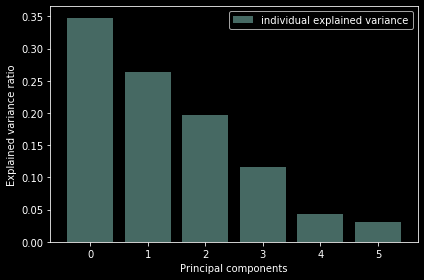

In [77]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [78]:
#Explore gaussian in data
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6).fit(X)
labels = gmm.predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [79]:
#Splitting the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
# 7 is just any random seed number

In [80]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [81]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=x_train.columns))

Feature importances: 
                    Imp
cement        0.365624
slag          0.102714
ash           0.010498
water         0.128554
superplastic  0.034708
coarseagg     0.021632
fineagg       0.016547
age           0.319722


So, cement, age and water are significant attributes.
Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [82]:
y_pred = dt_model.predict(x_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9953725270651557
Performance on testing data using DT: 0.8335377281123088
Accuracy DT:  0.8335377281123088
MSE:  43.043957928802584



There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

In [83]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538


In [84]:
#K fold cross validation

In [85]:
from sklearn.model_selection import KFold

In [86]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, Y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8596194054627212
Standard Deviation:  0.04223211009987902


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [87]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619


In [88]:
#Random Forest Regressor
model=RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using RFR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9827937216785128
Performance on testing data using RFR: 0.9138297688874738
Accuracy DT:  0.9138297688874739
MSE:  22.281972729683922


This model is also overfit.

In [90]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619
3,Random Forest Regressor,0.913830


## Gradient boosting

In [91]:
model=GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using GBR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.950639724286882
Performance on testing data using GBR: 0.9146726278553199
Accuracy DT:  0.9146726278553199
MSE:  22.06402553035485


In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619
3,Random Forest Regressor,0.913830
4,Gradient Boost Regressor,0.914673


In [94]:
#K fold
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, Y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9056509308511179
Standard Deviation:  0.019032464036096115


In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619
3,Random Forest Regressor,0.913830
4,Gradient Boost Regressor,0.914673
5,Gradient Boost Regressor k fold,0.905651


## Ada Boosting Regressor

In [96]:
model=AdaBoostRegressor()
model.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [97]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using GBR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8243605464341013
Performance on testing data using GBR: 0.7678518300613835
Accuracy DT:  0.7678518300613835
MSE:  60.02907413655937


In [98]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619
3,Random Forest Regressor,0.913830
4,Gradient Boost Regressor,0.914673
5,Gradient Boost Regressor k fold,0.905651
6,Ada Boosting Regressor,0.767852


## Bagging Regressor

In [99]:
model=BaggingRegressor()
model.fit(x_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [100]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using GBR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9750064474478576
Performance on testing data using GBR: 0.9002814528640617
Accuracy DT:  0.9002814528640617
MSE:  25.785307979795938


In [101]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619
3,Random Forest Regressor,0.913830
4,Gradient Boost Regressor,0.914673
5,Gradient Boost Regressor k fold,0.905651
6,Ada Boosting Regressor,0.767852
7,Bagging Regressor,0.900281


In [102]:
# Support V|ector Regressor
model = SVR(kernel='linear')
model.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [103]:
y_pred = model.predict(x_test)
# performance on train data
print('Performance on training data using SVR:',model.score(x_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(x_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.693451706413177
Performance on testing data using SVR: 0.7012592205147918
Accuracy SVR:  0.7012592205147918
MSE:  77.24864858539648


In [104]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619
3,Random Forest Regressor,0.913830
4,Gradient Boost Regressor,0.914673
5,Gradient Boost Regressor k fold,0.905651
6,Ada Boosting Regressor,0.767852
7,Bagging Regressor,0.900281
8,Support Vector Regressor,0.701259


## Ensemble KNN,SVR & LR

In [105]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [106]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(x_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [107]:
y_pred = evc.predict(x_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(x_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(x_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8056692624645656
Performance on testing data using ensemble: 0.7584163896730313
Accuracy ensemble:  0.7584163896730313
MSE:  62.468898455369406


In [108]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.833538
2,Decision Tree k fold,0.859619
3,Random Forest Regressor,0.913830
4,Gradient Boost Regressor,0.914673
5,Gradient Boost Regressor k fold,0.905651
6,Ada Boosting Regressor,0.767852
7,Bagging Regressor,0.900281
8,Support Vector Regressor,0.701259
9,Ensemble,0.758416


## Bootstrap Sampling

In [109]:
concrete_XY = X.join(Y)

In [110]:
#Using Gradient boosting

In [111]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(data4) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

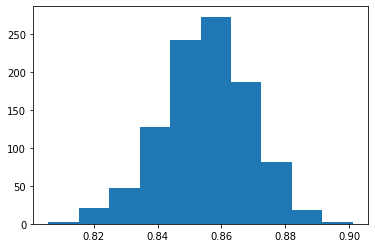

95.0 confidence interval 82.7% and 88.0%


In [112]:

# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [113]:
#Using Random Forest Regressor

values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(data4) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

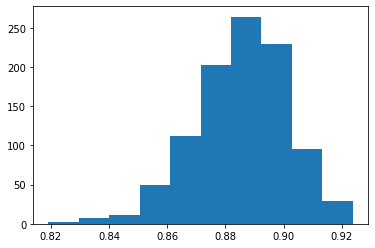

95.0 confidence interval 85.2% and 91.4%


In [114]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## The bootstrap random forest classification model performance is between 85%-91% which is better than other classification algorithms.